In [1]:
from importlib import reload
import matplotlib.pyplot as plt
import cryptoz
from cryptoz import stats
import pandas as pd
import numpy as np

# data

In [299]:
from_dt = cryptoz.data.ago_dt(days=3)
to_dt = cryptoz.data.now_dt()
period = cryptoz.data.Period.M5

In [300]:
ohlc = cryptoz.data.chartdata('(USDT_+)', from_dt, to_dt, period)

   count         mean          std       min        25%        50%      75%  \
0  876.0  1170.883819  2920.855339  0.069371  18.374501  135.88695  542.825   

       max  
0  11733.0  


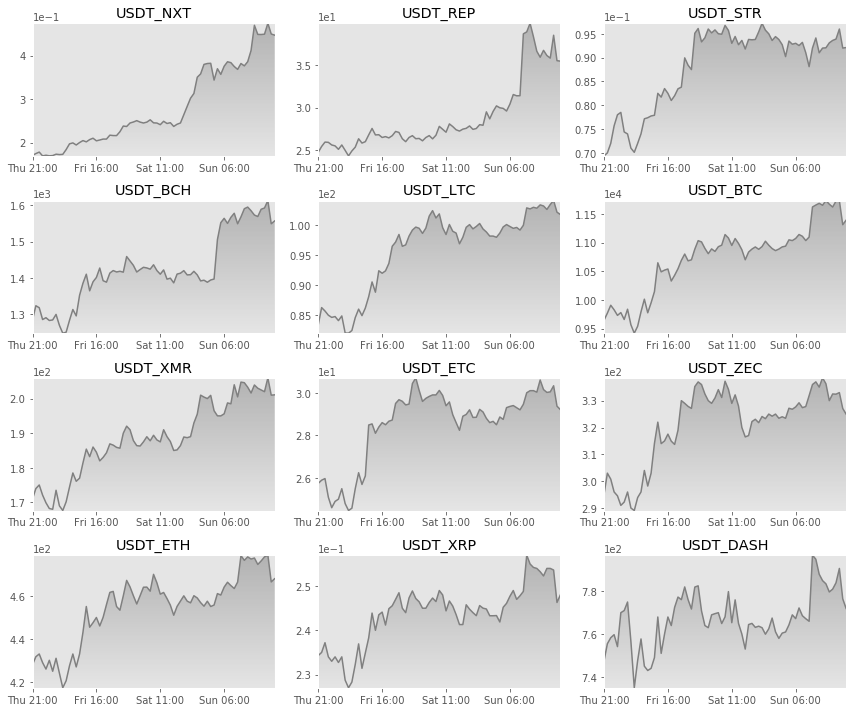

In [301]:
df = cryptoz.utils.to_df(ohlc, 'C')

cryptoz.plot.time_series(df.resample('1h').last(), ranker=lambda sr: 1 - sr.iloc[-1] / sr.min())

# recovery

In [5]:
df = stats.recovery.dd(ohlc)

cryptoz.utils.describe_df(df)

,count,mean,std,min,25%,50%,75%,max
USDT_BCH,864.0,-0.167486,0.056136,-0.288750,-0.210465,-0.162230,-0.137071,-0.002354
USDT_BTC,864.0,-0.112542,0.051764,-0.239982,-0.156264,-0.114854,-0.068552,-0.001925
USDT_DASH,864.0,-0.071069,0.032919,-0.216021,-0.086179,-0.065985,-0.049468,-0.006369
USDT_ETC,864.0,-0.129894,0.077667,-0.304000,-0.190393,-0.146084,-0.053735,-0.003268
USDT_ETH,864.0,-0.140558,0.044549,-0.241715,-0.173430,-0.141611,-0.107212,-0.012671
USDT_LTC,864.0,-0.131363,0.072143,-0.270356,-0.189249,-0.150628,-0.055803,-0.004000
USDT_NXT,864.0,-0.108189,0.079271,-0.277913,-0.175468,-0.109357,-0.026501,-0.001086
USDT_REP,864.0,-0.166706,0.048673,-0.277845,-0.195594,-0.170632,-0.146835,-0.011043
USDT_STR,864.0,-0.138194,0.082262,-0.351107,-0.207101,-0.152555,-0.052029,-0.005920
USDT_XMR,864.0,-0.143322,0.049753,-0.270725,-0.179747,-0.137375,-0.104568,-0.012077


In [6]:
stats.recovery.dd_now(ohlc)

USDT_BCH    -0.130600
USDT_ZEC    -0.114667
USDT_XRP    -0.101533
USDT_REP    -0.099402
USDT_ETH    -0.097466
USDT_XMR    -0.077295
USDT_DASH   -0.041975
USDT_ETC    -0.037693
USDT_STR    -0.035582
USDT_BTC    -0.033426
USDT_LTC    -0.025139
USDT_NXT    -0.017129
dtype: float64

   count      mean       std       min       25%       50%      75%       max
0  876.0 -0.132883  0.064662 -0.291879 -0.179488 -0.140865 -0.08066 -0.005585


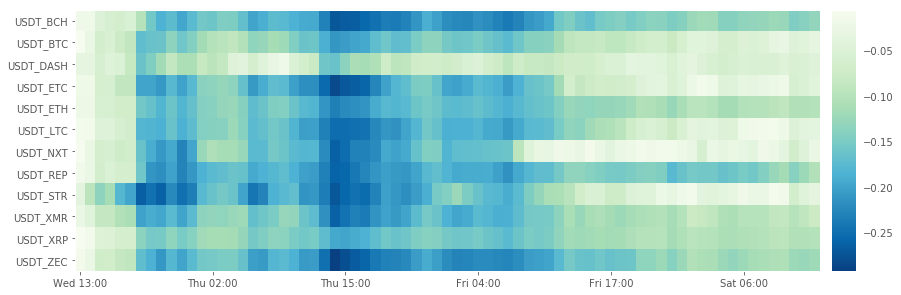

In [7]:
df = stats.recovery.resampled_dd(ohlc, '1h')

cryptoz.plot.evolution(df)

In [8]:
stats.recovery.maxdd_duration(ohlc)

USDT_XRP    0 days 04:55:00
USDT_BTC    0 days 05:25:00
USDT_DASH   0 days 05:30:00
USDT_ETC    0 days 05:30:00
USDT_LTC    0 days 05:30:00
USDT_STR    0 days 06:05:00
USDT_XMR    0 days 06:25:00
USDT_REP    0 days 23:40:00
USDT_BCH    0 days 23:45:00
USDT_ZEC    0 days 23:55:00
USDT_NXT    1 days 00:00:00
USDT_ETH    1 days 01:05:00
dtype: timedelta64[ns]

In [9]:
df = cryptoz.utils.to_df(stats.recovery.details(ohlc), 'dd_len')

cryptoz.utils.describe_df(df)

,count,mean,std,min,25%,50%,75%,max
USDT_BCH,3.0,96.000000,163.679565,1.0,1.50,2.0,143.50,285.0
USDT_BTC,2.0,33.500000,44.547727,2.0,17.75,33.5,49.25,65.0
USDT_DASH,5.0,27.000000,28.026773,1.0,5.00,17.0,46.00,66.0
USDT_ETC,4.0,44.750000,47.647141,5.0,5.75,36.0,75.00,102.0
USDT_ETH,1.0,301.000000,NaN,301.0,301.00,301.0,301.00,301.0
USDT_LTC,4.0,24.250000,30.510927,1.0,1.75,15.0,37.50,66.0
USDT_NXT,18.0,24.444444,66.539879,1.0,1.00,6.0,11.75,288.0
USDT_REP,3.0,95.333333,163.390126,1.0,1.00,1.0,142.50,284.0
USDT_STR,13.0,11.538462,19.384768,1.0,2.00,4.0,15.00,73.0
USDT_XMR,1.0,77.000000,NaN,77.0,77.00,77.0,77.00,77.0


# corr

   count      mean       std       min       25%       50%       75%  max
0  144.0  0.773293  0.235848  0.014425  0.654786  0.876517  0.934288  1.0


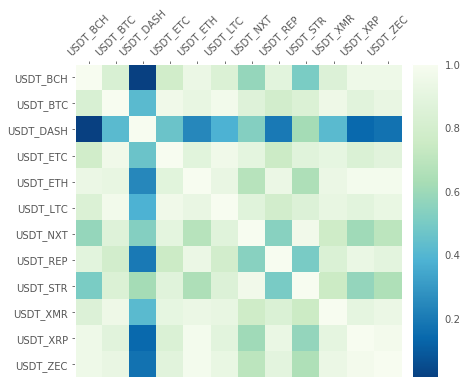

In [10]:
df = stats.corr.corr(cryptoz.utils.to_df(ohlc, 'C'))

cryptoz.plot.matrix(df)

   count      mean      std      min      25%       50%       75%      max
0  720.0  0.632383  0.35018 -0.79528  0.48719  0.759474  0.886611  0.98875


/Users/olegpolakow/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


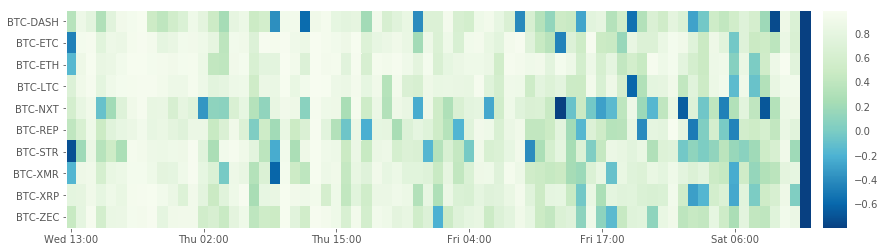

In [11]:
import re

df = cryptoz.utils.to_df(ohlc, 'C')
df = stats.corr.resampled_corr(df, '1h')
regex = re.compile('(USDT_BTC-+)')
df = df[list(filter(regex.search, df.columns))]
df.columns = list(map(lambda x: re.sub(r'(USDT_)', '', x), df.columns))

norm = cryptoz.plot.MidpointNormalize(midpoint=0.0)
cryptoz.plot.evolution(df, norm=norm)

# depth

In [12]:
orderbooks = cryptoz.data.orderbooks('(USDT_+)')

    count         mean            std            min          25%      50%  \
0  2400.0 -6164.771654  160757.836138 -497257.067989 -71904.11638  0.12432   

           75%            max  
0  81067.16465  448451.176392  


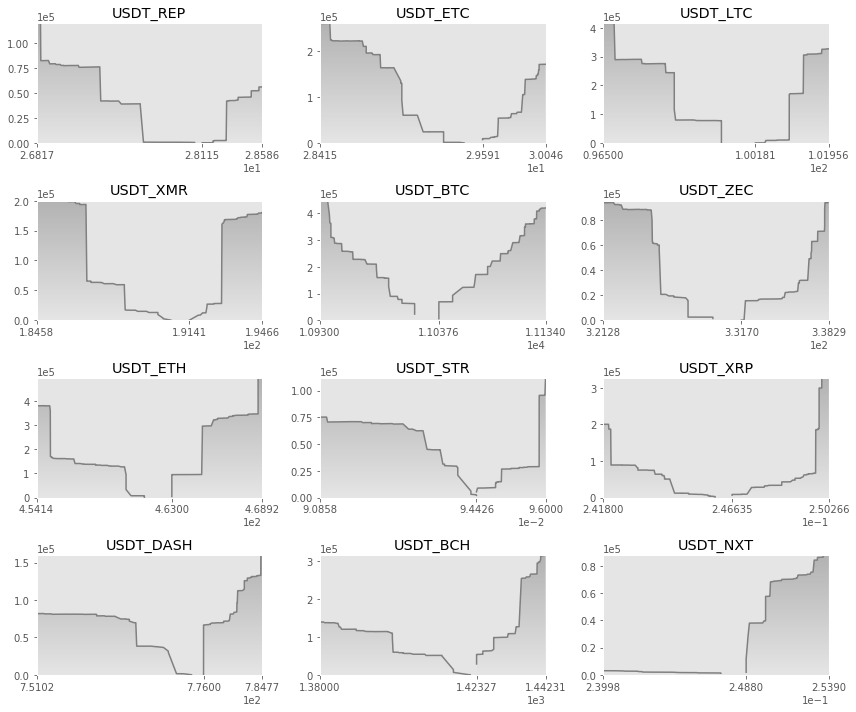

In [13]:
cryptoz.plot.depth(orderbooks, colors=('grey', 'grey'), ranker=lambda sr: 1 - sr.max() / abs(sr.min()))

# score

In [302]:
def BB(sr, window, std_n):
    rollmean_sr = sr.rolling(window=window, min_periods=1).mean()
    rollstd_sr = sr.rolling(window=window, min_periods=1).std()
    upper_band_sr = rollmean_sr + std_n * rollstd_sr
    lower_band_sr = rollmean_sr - std_n * rollstd_sr
    return upper_band_sr, lower_band_sr

def crossover(sr1, sr2):
    return sr1 - sr2

def normalize(sr):
    return (sr - sr.mean()) / sr.std()

   count      mean      std        min       25%       50%      75%   max
0  876.0  1.248231  7.01712 -11.982198 -4.931164 -0.536419  8.12215  12.0


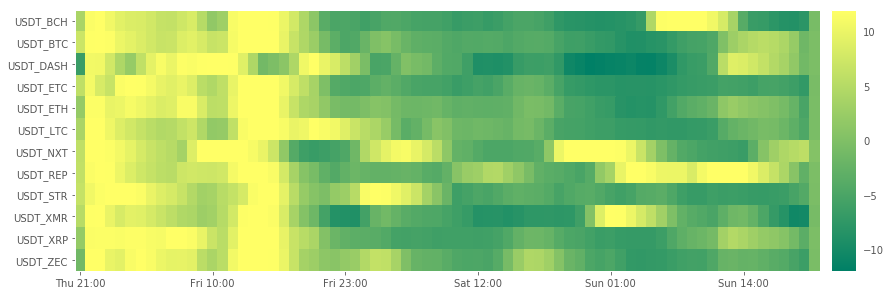

In [306]:
strategy = lambda ohlc_df: normalize(crossover(*BB(ohlc_df['C'], 6 * 20, 3)))
df1 = pd.DataFrame({pair: strategy(ohlc_df) for pair, ohlc_df in ohlc.items()})
score1 = cryptoz.score.safe_apply(df1, -1, 1)

cryptoz.plot.evolution(score1.resample('1h').sum(), cmap=plt.cm.summer)

   count      mean       std        min       25%       50%       75%  \
0  876.0 -0.964202  5.086831 -10.742361 -4.675025 -1.639812  2.339985   

         max  
0  11.758411  


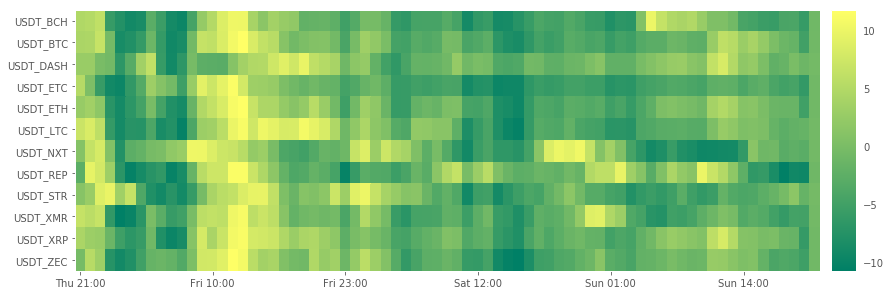

In [307]:
strategy = lambda ohlc_df: normalize(crossover(ohlc_df['C'], ohlc_df['C'].rolling(window=6 * 20, min_periods=1).mean()))
df2 = pd.DataFrame({pair: strategy(ohlc_df) for pair, ohlc_df in ohlc.items()})
score2 = cryptoz.score.safe_apply(df2, -1, 1)

cryptoz.plot.evolution(score2.resample('1h').sum(), cmap=plt.cm.summer)

Rules
1. narrow corridor and price over MA -> trend up -> buy
2. wide corridor and price below MA -> oversold -> buy
3. narrow corridor and price below MA -> trend down -> sell
4. wide corridor and price above MA -> overbought -> sell

   count      mean       std        min      25%       50%       75%       max
0  876.0 -6.503528  4.522734 -11.758411 -9.90617 -7.908953 -4.433721  9.731767


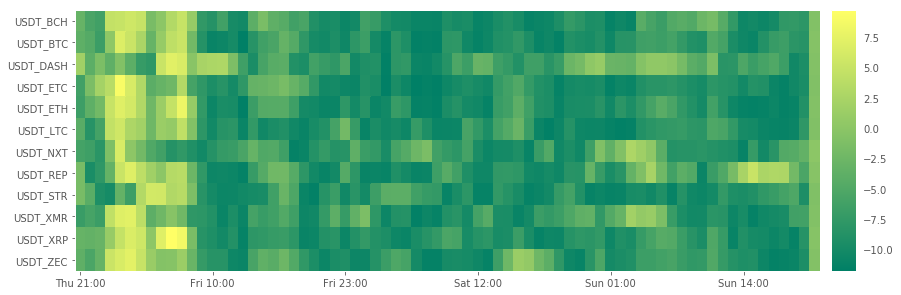

In [317]:
score_df = cryptoz.score.diff(score1, score2)

cryptoz.plot.evolution(score_df.resample('1h').sum(), cmap=plt.cm.summer)